In [1]:
import arxiv
from sentence_transformers import SentenceTransformer
import umap
import nltk
nltk.download('punkt')

c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to T

True

In [2]:
import urllib, urllib.request
from bs4 import BeautifulSoup
url = 'https://export.arxiv.org/api/query?search_query=au:robert+koenig&cat:quant-ph&start=0&max_results=59'
with urllib.request.urlopen(url) as response:
    soup = BeautifulSoup(response, "lxml")
    

In [3]:
titles = soup.find_all('title')
titles = list(map(lambda x:x.text, titles))
del titles[0]

titles[-1]

'Locking of accessible information and implications for the security of\n  quantum cryptography'

In [4]:
summaries = soup.find_all('summary')
summaries = list(map(lambda x:x.text, summaries))
summaries[-1]

"  The unconditional security of a quantum key distribution protocol is often\ndefined in terms of the accessible information, that is, the maximum mutual\ninformation between the distributed key S and the outcome of an optimal\nmeasurement on the adversary's (quantum) system. We show that, even if this\nquantity is small, certain parts of the key S might still be completely\ninsecure when S is used in applications, such as for one-time pad encryption.\nThis flaw is due to a locking property of the accessible information: one\nadditional (physical) bit of information might increase the accessible\ninformation by more than one bit.\n"

In [5]:
def retrieve_name(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Robert" or split_name[1] == "Koenig" else False

names = soup.find_all('name')
names = list(map(lambda x:x.text, names))
names = list(filter(retrieve_name, names))
del names[names.index('Robert Howe')]

indices = list([names.index('Alexander Koenig'), names.index('Robert A. Bridges')])
indices

[33, 15]

In [6]:
titles_to_remove = list()
summaries_to_remove = list()

for index in indices:
    titles_to_remove.append(titles[index])
    summaries_to_remove.append(summaries[index])
    
for title, summary in zip(titles_to_remove, summaries_to_remove):
    titles.remove(title)
    summaries.remove(summary)

In [7]:
koenig_papers = list()
for title, summary in zip(titles, summaries):
    koenig_papers.append(title + '.' + '\n\n' + summary)

In [8]:
print(koenig_papers[0])

The conditional entropy power inequality for Gaussian quantum states.

  We propose a generalization of the quantum entropy power inequality involving
conditional entropies. For the special case of Gaussian states, we give a proof
based on perturbation theory for symplectic spectra. We discuss some
implications for entanglement-assisted classical communication over additive
bosonic noise channels.



In [18]:
len(koenig_papers)

57

In [61]:
search = arxiv.Search(query = "quantum", max_results=350, sort_by=arxiv.SortCriterion.SubmittedDate)

In [62]:
papers = list()
for result in search.results():
    papers.append(result.title + '.' + '\n\n' + result.summary)

In [63]:
len(papers)

350

In [64]:
print(papers[0])

Data Encoding For Healthcare Data Democratisation and Information Leakage Prevention.

The lack of data democratization and information leakage from trained models
hinder the development and acceptance of robust deep learning-based healthcare
solutions. This paper argues that irreversible data encoding can provide an
effective solution to achieve data democratization without violating the
privacy constraints imposed on healthcare data and clinical models. An ideal
encoding framework transforms the data into a new space where it is
imperceptible to a manual or computational inspection. However, encoded data
should preserve the semantics of the original data such that deep learning
models can be trained effectively. This paper hypothesizes the characteristics
of the desired encoding framework and then exploits random projections and
random quantum encoding to realize this framework for dense and longitudinal or
time-series data. Experimental evaluation highlights that models trained on
e

In [65]:
#tokenize text into sentences
tokenized_papers = [nltk.sent_tokenize(paper) for paper in papers]

In [66]:
tokenized_papers[0]

['Data Encoding For Healthcare Data Democratisation and Information Leakage Prevention.',
 'The lack of data democratization and information leakage from trained models\nhinder the development and acceptance of robust deep learning-based healthcare\nsolutions.',
 'This paper argues that irreversible data encoding can provide an\neffective solution to achieve data democratization without violating the\nprivacy constraints imposed on healthcare data and clinical models.',
 'An ideal\nencoding framework transforms the data into a new space where it is\nimperceptible to a manual or computational inspection.',
 'However, encoded data\nshould preserve the semantics of the original data such that deep learning\nmodels can be trained effectively.',
 'This paper hypothesizes the characteristics\nof the desired encoding framework and then exploits random projections and\nrandom quantum encoding to realize this framework for dense and longitudinal or\ntime-series data.',
 'Experimental evaluation

In [67]:
len(tokenized_papers[0])

7

In [72]:
import numpy as np
idx = np.argmin([len(paper) for paper in tokenized_papers])
print(idx)

41


In [73]:
len(tokenized_papers[idx])

2

In [74]:
tokenized_papers[idx]

['Operads, homotopy theory and higher categories in algebraic quantum field theory.',
 'This chapter provides a non-technical overview and motivation for the recent\ninteractions between algebraic quantum field theory (AQFT) and rather abstract\nmathematical disciplines such as operads, model categories and higher\ncategories.']

In [77]:
# count number of sentences in each paper
num_sentences = [len(paper) for paper in tokenized_papers]

In [107]:
# remove papers with less than 2 sentences in the abstract
valid_papers = list()
for i in range(len(papers)):
    if num_sentences[i] > 4:
        valid_papers.append(papers[i])

In [108]:
len(valid_papers)

304

In [109]:
tokenized_valid_papers = [nltk.sent_tokenize(paper) for paper in valid_papers]

In [110]:
vidx = np.argmin([len(paper) for paper in tokenized_valid_papers])
print(vidx)

38


In [111]:
print(len(tokenized_valid_papers[idx]))

9


In [114]:
print(valid_papers[idx])

Complexity of spin configurations dynamics due to unitary evolution and periodic projective measurements.

We study the Hamiltonian dynamics of a many-body quantum system subjected to
periodic projective measurements which leads to probabilistic cellular automata
dynamics. Given a sequence of measured values, we characterize their dynamics
by performing a principal component analysis. The number of principal
components required for an almost complete description of the system, which is
a measure of complexity we refer to as PCA complexity, is studied as a function
of the Hamiltonian parameters and measurement intervals. We consider different
Hamiltonians that describe interacting, non-interacting, integrable, and
non-integrable systems, including random local Hamiltonians and translational
invariant random local Hamiltonians. In all these scenarios, we find that the
PCA complexity grows rapidly in time before approaching a plateau. The dynamics
of the PCA complexity can vary quantitati

In [115]:
embeddings = list()
model = SentenceTransformer('all-MiniLM-L6-v2')
for token_paper in tokenized_valid_papers:
    embeddings.append(model.encode(token_paper))

In [122]:
import numpy as np
np.argmin([embedding.shape[0] for embedding in embeddings])
len(tokenized_valid_papers[38])

2

In [129]:
# remove the paper with the least number of sentences
embeddings.pop(38)

array([[ 0.06081802, -0.03395788,  0.02683055, ...,  0.02328086,
        -0.09842872, -0.03384157],
       [-0.03720855, -0.06228502, -0.00757967, ...,  0.06857048,
         0.01825914, -0.03236686],
       [-0.02817055, -0.06700587,  0.01448985, ...,  0.0744395 ,
         0.01118425,  0.03867149]], dtype=float32)

In [130]:
np.argmin([embedding.shape[0] for embedding in embeddings])

39

In [131]:
embeddings[39].shape

(3, 384)

In [134]:
# check if all embeddings are not empty or have missing values
for i in range(len(embeddings)):
    if np.isnan(embeddings[i]).any():
        print(i)
    if len(embeddings[i]) == 0:
        print(i)

In [136]:
reducer = umap.UMAP(n_neighbors=4, init='random', n_components=2)
umap_embeddings=list(map(lambda x:reducer.fit_transform(x), embeddings))

c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size;

In [147]:
# check umap embeddings
index = np.argmax([embedding.shape[0] for embedding in umap_embeddings])
umap_embeddings[index].shape

(15, 2)

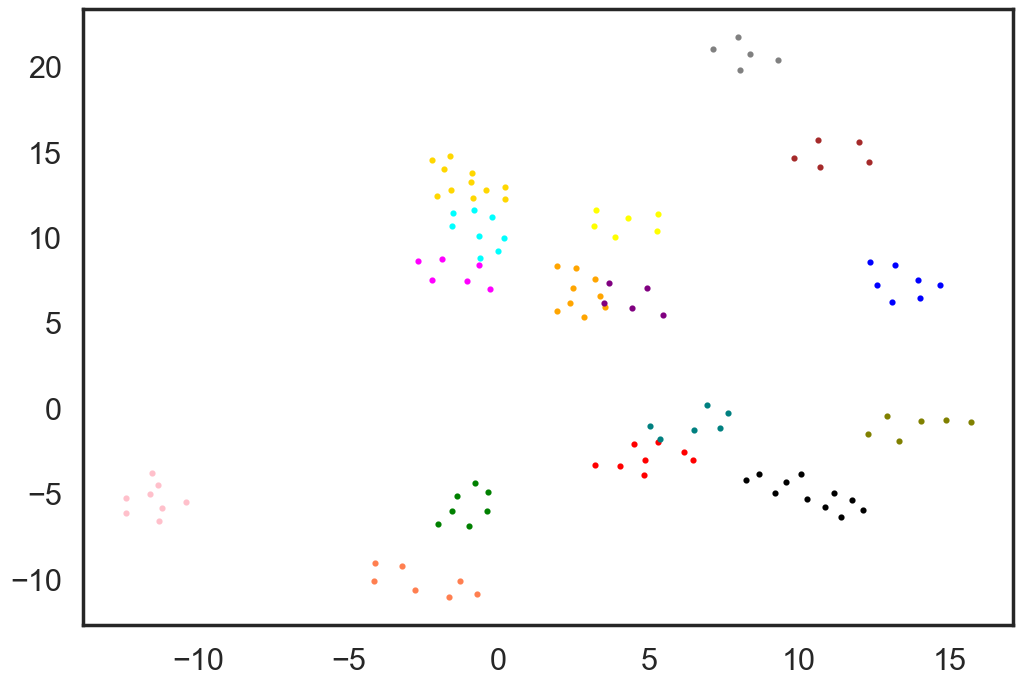

In [166]:
# plot the umap embeddings
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(umap_embeddings[0][:,0], umap_embeddings[0][:,1], s=6, c='blue')
plt.scatter(umap_embeddings[1][:,0], umap_embeddings[1][:,1], s=6, c='red')
plt.scatter(umap_embeddings[2][:,0], umap_embeddings[2][:,1], s=6, c='green')
plt.scatter(umap_embeddings[3][:,0], umap_embeddings[3][:,1], s=6, c='orange')
plt.scatter(umap_embeddings[4][:,0], umap_embeddings[4][:,1], s=6, c='purple')
plt.scatter(umap_embeddings[5][:,0], umap_embeddings[5][:,1], s=6, c='yellow')
plt.scatter(umap_embeddings[6][:,0], umap_embeddings[6][:,1], s=6, c='pink')
plt.scatter(umap_embeddings[7][:,0], umap_embeddings[7][:,1], s=6, c='brown')
plt.scatter(umap_embeddings[8][:,0], umap_embeddings[8][:,1], s=6, c='black')
plt.scatter(umap_embeddings[9][:,0], umap_embeddings[9][:,1], s=6, c='gray')
plt.scatter(umap_embeddings[10][:,0], umap_embeddings[10][:,1], s=6, c='cyan')
plt.scatter(umap_embeddings[11][:,0], umap_embeddings[11][:,1], s=6, c='magenta')
plt.scatter(umap_embeddings[12][:,0], umap_embeddings[12][:,1], s=6, c='olive')
plt.scatter(umap_embeddings[13][:,0], umap_embeddings[13][:,1], s=6, c='teal')
plt.scatter(umap_embeddings[14][:,0], umap_embeddings[14][:,1], s=6, c='coral')
plt.scatter(umap_embeddings[15][:,0], umap_embeddings[15][:,1], s=6, c='gold')